In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("steam_reviews.csv")
df.head()


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [3]:
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.shape

(21747371, 22)

In [6]:
df.dtypes


app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

In [7]:
df.isnull().sum()

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

In [9]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179438e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


In [10]:
df['language_mapped'], uniques = pd.factorize(df['language'])
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,language_mapped
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09,0
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09,0
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09,0
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09,1
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09,0


In [11]:
df_wo_ids =  df.drop(["app_id","review_id","author.steamid"],axis=1)


In [12]:
df_wo_ids.head()

,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,language_mapped
0,The Witcher 3: Wild Hunt,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,6,2,1909.0,1448.0,1909.0,1.611343e+09,0
1,The Witcher 3: Wild Hunt,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,30,10,2764.0,2743.0,2674.0,1.611386e+09,0
2,The Witcher 3: Wild Hunt,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,5,1,1061.0,1061.0,1060.0,1.611384e+09,0
3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09,1
4,The Witcher 3: Wild Hunt,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,7,4,217.0,42.0,217.0,1.610788e+09,0


<Axes: xlabel='recommended', ylabel='count'>

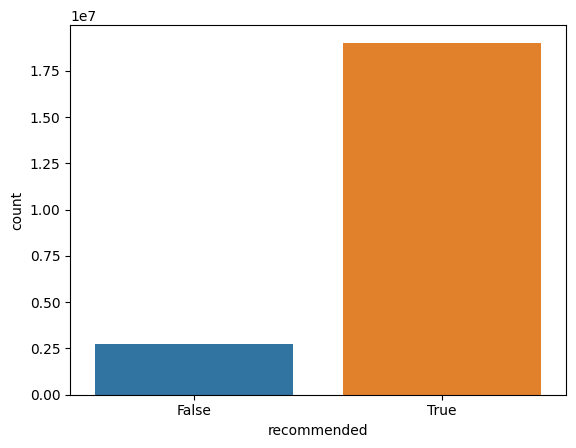

In [13]:
import seaborn as sns
sns.countplot(x='recommended', data=df)


<Axes: >

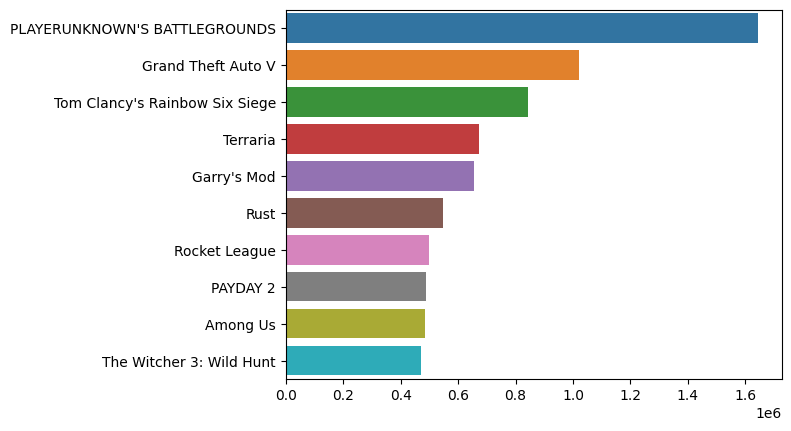

In [14]:
top_games = df['app_name'].value_counts().head(10)
sns.barplot(x=top_games.values, y=top_games.index)

In [15]:
df['app_name'].unique()


array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       'Half-Life 2: Episode Two', 'Portal 2', 'X Rebirth', "Garry's Mod",
       "Sid Meier's Civilization V", 'Dead by Daylight',
       "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat',
       'Beat Saber', 'Cold Waters', 'Banished', 'Celeste',
       'Getting Over It with Bennett Foddy', 'A Hat in Time',
       'Overcooked! 2', 'Slipstream', 'The Forest',
       'Pogostuck: Rage With Your Friends', 'PC Building Simulator',
       'RollerCoaster Tycoon World', 'NBA 2K18', 'NBA 2K21',
       'Deus Ex: The Fall', 'Rapture Rejects', 'Artifact',
       'Call of Duty: Infinite Warfare', 'Cube World', 'NBA 2K19',
       'Nether', 'Wolfenstein: Youngblood',
       'Warhammer 40,000: Dawn of War III', 'Takedown: Red Sabre',
       'ATLAS', 'Stay Out', 'Identity', 'Umbrella Corps',
       'Hunt Down The Freeman', 'WWE 2K20', 'Down To One', 'Axiom Verge',
       'Guacamelee! Super Turbo Championship Editi

In [16]:
df[(df['app_name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS") & (df['recommended'] == False)].value_counts()


app_id  app_name                       review_id  language  review                                                                                                                                                                                                                                                                                                            timestamp_created  timestamp_updated  recommended  votes_helpful  votes_funny  weighted_vote_score  comment_count  steam_purchase  received_for_free  written_during_early_access  author.steamid     author.num_games_owned  author.num_reviews  author.playtime_forever  author.playtime_last_two_weeks  author.playtime_at_review  author.last_played  language_mapped
578080  PLAYERUNKNOWN'S BATTLEGROUNDS  30686847   english   Apex Legends > RoE  > Ebola > Aids > Cancer >  PUBG > Fortnite                                                                                                                                                      

In [17]:
df[(df['app_name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS") & (df['recommended'] == True)].value_counts()


app_id  app_name                       review_id  language  review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

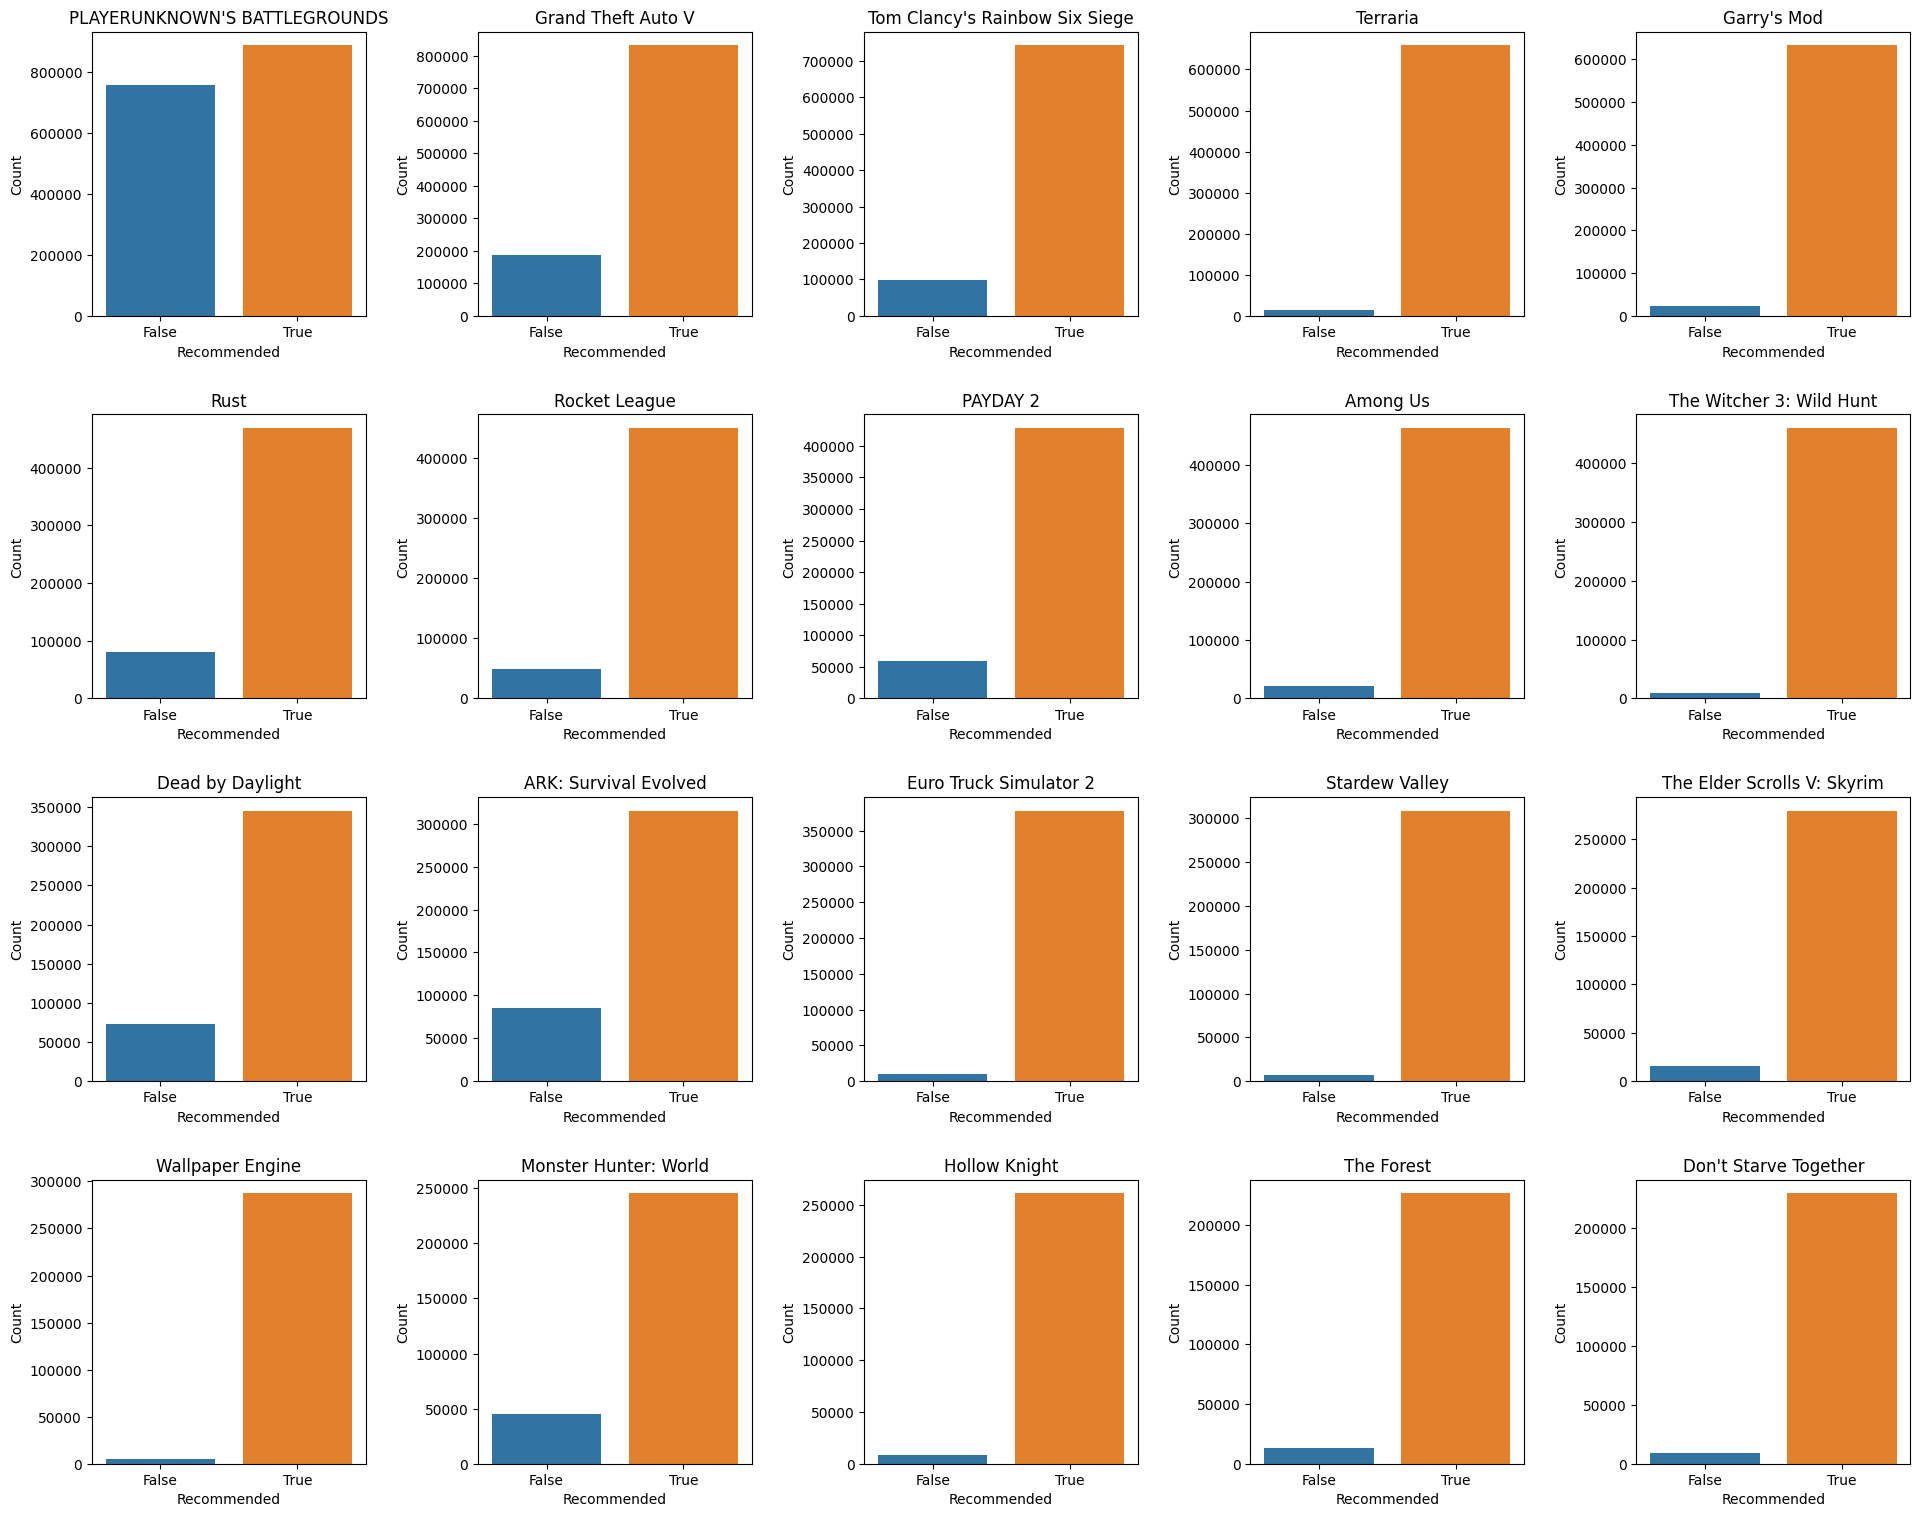

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_20_games = df['app_name'].value_counts().head(20).index

recommendations_per_game = df.groupby(['app_name', 'recommended']).size().reset_index(name='count')

fig, axes = plt.subplots(4, 5, figsize=(20, 16))  
fig.tight_layout(pad=5.0)  

for i, game in enumerate(top_20_games):
    
    game_data = recommendations_per_game[recommendations_per_game['app_name'] == game]
    
   
    ax = axes[i // 5, i % 5] 
    
    sns.barplot(x='recommended', y='count', data=game_data, ax=ax)
    
    ax.set_title(f"{game}")
    ax.set_xlabel("Recommended")
    ax.set_ylabel("Count")

plt.show()


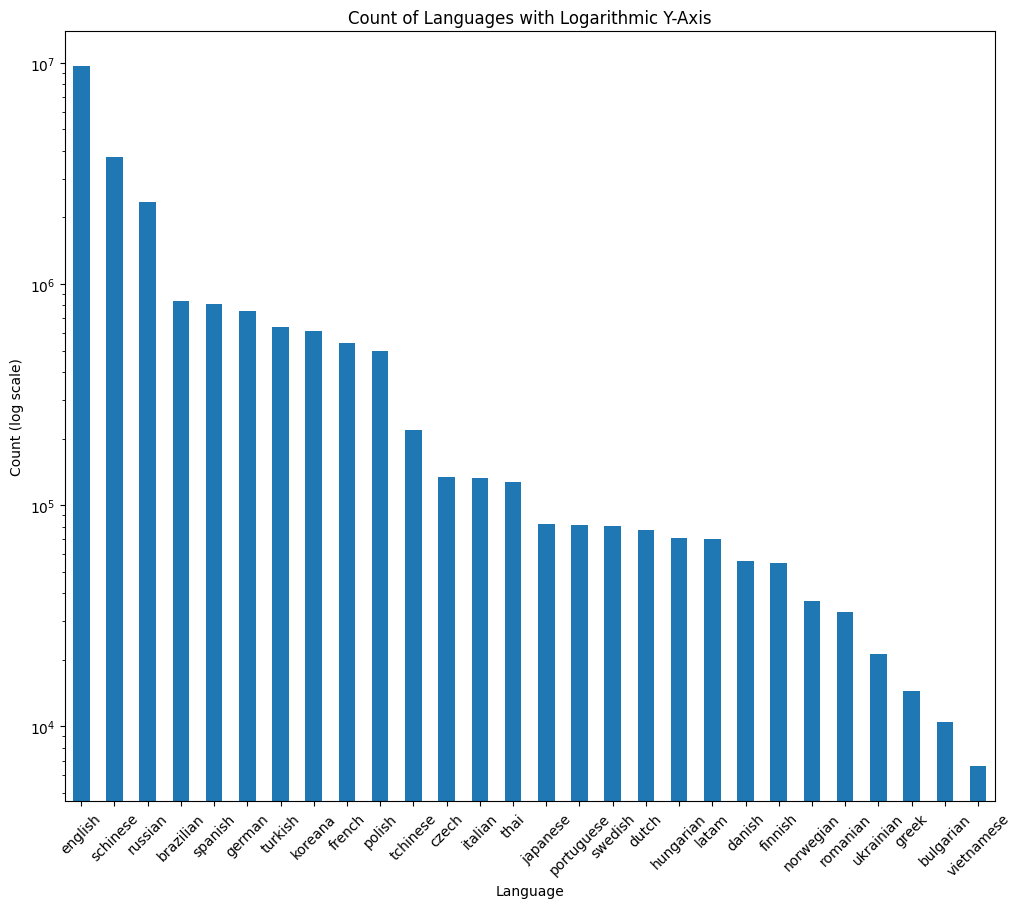

In [19]:
language_counts = df['language'].value_counts()

plt.figure(figsize=(12, 10))
language_counts.plot(kind='bar')
plt.yscale('log')

plt.title('Count of Languages with Logarithmic Y-Axis')
plt.xlabel('Language')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Number of Bad Recommendations (False) Made During or After Early Access')

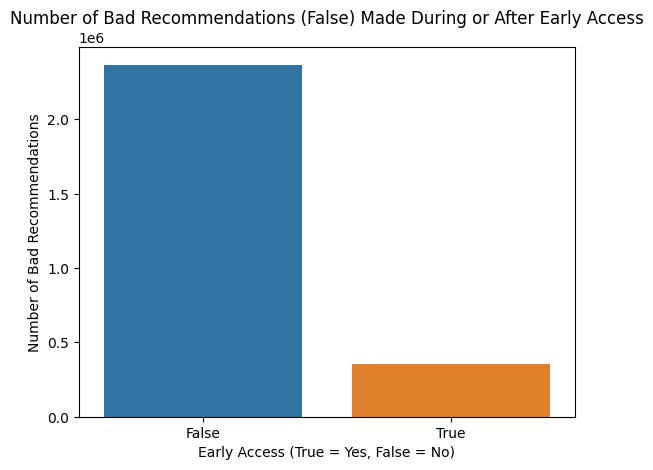

In [20]:
df_rcm_f = df[df['recommended']==False]
df_rcm_t = df[df['recommended']==True]


sns.countplot(x='written_during_early_access', data=df_rcm_f)

plt.xlabel("Early Access (True = Yes, False = No)")
plt.ylabel('Number of Bad Recommendations')
plt.title('Number of Bad Recommendations (False) Made During or After Early Access')

Text(0.5, 1.0, 'Number of Good Recommendations (True) Made During or After Early Access')

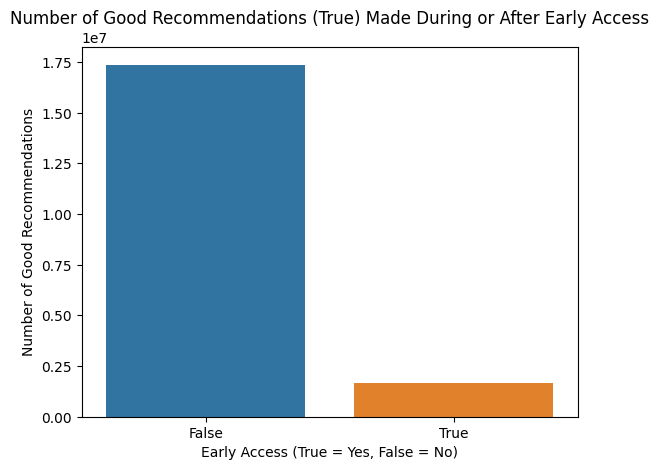

In [21]:
sns.countplot(x='written_during_early_access', data=df_rcm_t)

plt.xlabel("Early Access (True = Yes, False = No)")
plt.ylabel('Number of Good Recommendations')
plt.title('Number of Good Recommendations (True) Made During or After Early Access')

In [22]:
total_bad_rcm = len(df_rcm_f)

total_bad_rcm_early_access = len(df_rcm_f[df_rcm_f['written_during_early_access'] == True])
total_bad_rcm_not_early_access = len(df_rcm_f[df_rcm_f['written_during_early_access'] == False])



proportion_bad_early_access = (total_bad_rcm_early_access / total_bad_rcm) * 100

proportion_bad_early_access

13.085257752881812

In [23]:
proportion_bad_not_early_access = (total_bad_rcm_not_early_access/ total_bad_rcm)* 100
proportion_bad_not_early_access

86.9147422471182

In [24]:
total_good_rcm = len(df_rcm_t)

total_good_rcm_early_access = len(df_rcm_t[df_rcm_t['written_during_early_access'] == True])
total_good_rcm_not_early_access = len(df_rcm_t[df_rcm_t['written_during_early_access'] == False])



proportion_good_early_access = (total_good_rcm_early_access / total_good_rcm) * 100

proportion_good_early_access


8.725632287052091

In [25]:
proportion_good_not_early_access = (total_good_rcm_not_early_access / total_good_rcm) * 100
proportion_good_not_early_access

91.2743677129479

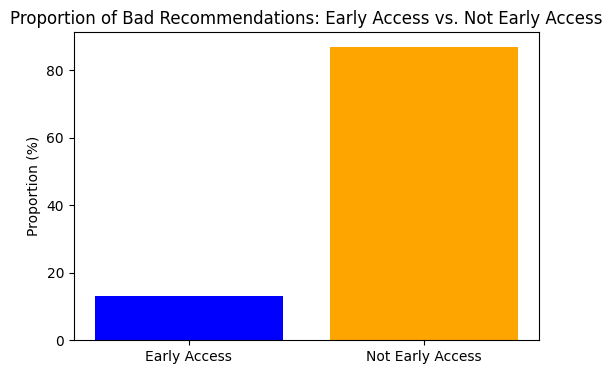

In [26]:
labels = ['Early Access', 'Not Early Access']
proportions = [proportion_bad_early_access, proportion_bad_not_early_access]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, proportions, color=['blue', 'orange'])
plt.ylabel('Proportion (%)')
plt.title('Proportion of Bad Recommendations: Early Access vs. Not Early Access')
plt.show()


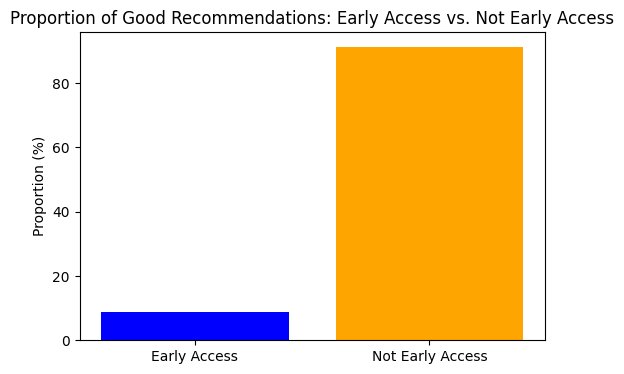

In [27]:
proportions = [proportion_good_early_access, proportion_good_not_early_access]

plt.figure(figsize=(6, 4))
plt.bar(labels, proportions, color=['blue', 'orange'])
plt.ylabel('Proportion (%)')
plt.title('Proportion of Good Recommendations: Early Access vs. Not Early Access')
plt.show()


In [48]:
top_10_ids = df.nlargest(10, 'author.playtime_forever')



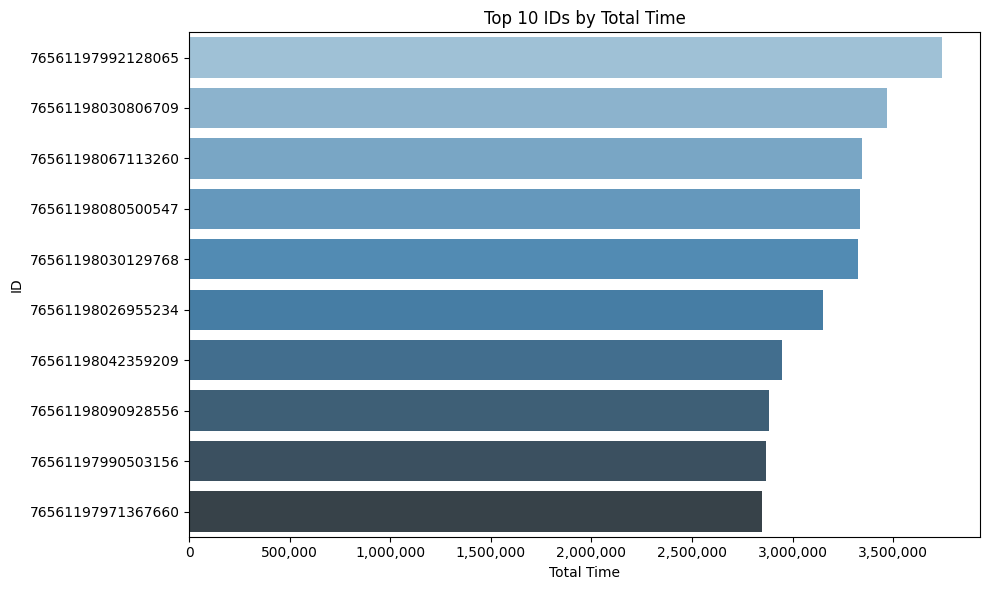

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df['author.steamid'] = df['author.steamid'].astype(str)


plt.figure(figsize=(10, 6))
sns.barplot(x='author.playtime_forever', y='author.steamid', data=top_10_ids, palette='Blues_d')
plt.xlabel('Total Time')
plt.ylabel('ID')
plt.title('Top 10 IDs by Total Time')

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
